<a href="https://colab.research.google.com/github/Adory01/Simple_Linear_Regression/blob/main/Classification%20Modelsipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC






In [41]:
# Load the dataset and convert to DataFrame
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy'])

In [42]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [43]:
# Helper function for confusion matrix plotting
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



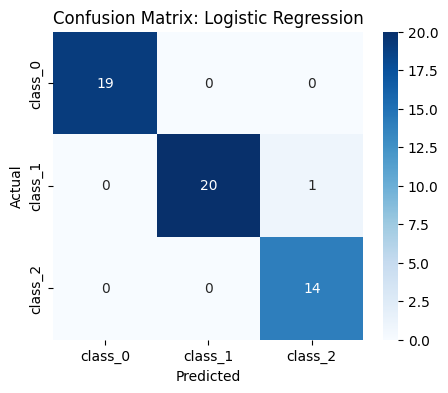

In [44]:
# Train & evaluate models
## 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression\n", classification_report(y_test, y_pred_lr))
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")#
results.loc[len(results)] = ['Logistic Regression', accuracy_score(y_test, y_pred_lr)]

Decision Tree
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



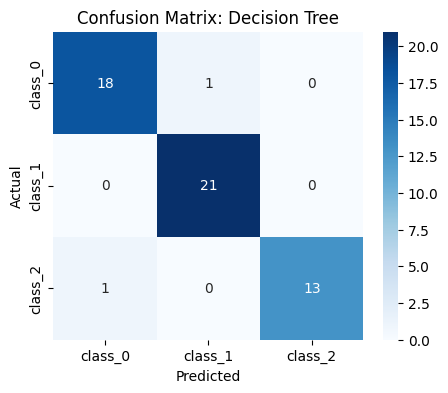

In [45]:
# 2. Desicion Tree classifire
# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Train
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print("Decision Tree\n", classification_report(y_test, y_pred_dt))

# Plot confusion matrix
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")

# Store accuracy
results.loc[len(results)] = ['Decision Tree', accuracy_score(y_test, y_pred_dt)]


Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



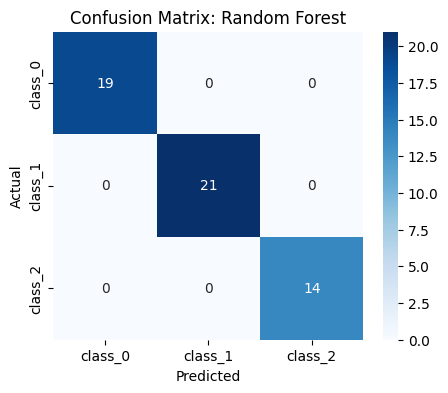

In [46]:
# 3. Random Forest classifier
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")

# Store accuracy
results.loc[len(results)] = ['Random Forest', accuracy_score(y_test, y_pred_rf)]


In [47]:
y_train_pred = rf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_scaled, y, cv=5)
print("Cross-validated accuracy:", scores.mean())


Train Accuracy: 1.0
Cross-validated accuracy: 0.9720634920634922


In [48]:
# 4. k-Nearest Neighbors (KNN)
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k}: Accuracy = {acc:.4f}")


k = 1: Accuracy = 0.9630
k = 2: Accuracy = 0.9444
k = 3: Accuracy = 0.9630
k = 4: Accuracy = 0.9630
k = 5: Accuracy = 0.9630
k = 6: Accuracy = 0.9630
k = 7: Accuracy = 0.9630
k = 8: Accuracy = 0.9815
k = 9: Accuracy = 0.9630
k = 10: Accuracy = 0.9630
k = 11: Accuracy = 0.9630
k = 12: Accuracy = 0.9630
k = 13: Accuracy = 0.9630
k = 14: Accuracy = 0.9630
k = 15: Accuracy = 0.9630


K-Nearest Neighbors
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



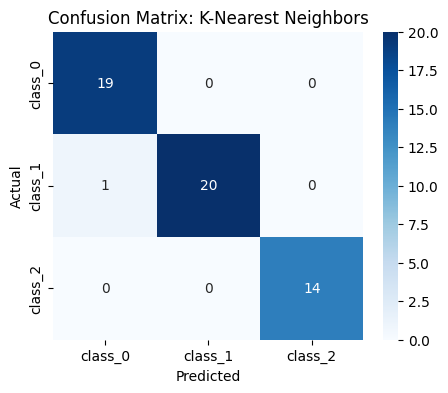

In [49]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=8)

# Train
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
print("K-Nearest Neighbors\n", classification_report(y_test, y_pred_knn))

# Plot confusion matrix
plot_conf_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

# Store accuracy
results.loc[len(results)] = ['K-Nearest Neighbors', accuracy_score(y_test, y_pred_knn)]


Naive Bayes
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



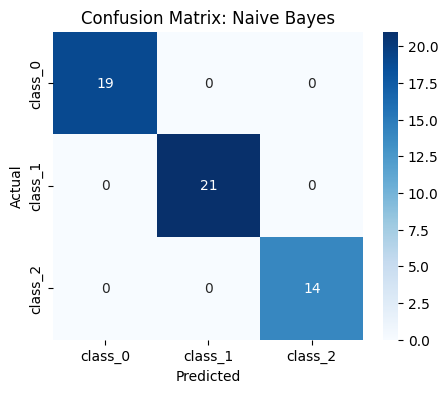

In [50]:
# 5. Naive Bayes
# Initialize the model
nb = GaussianNB()

# Train
nb.fit(X_train, y_train)

# Predict
y_pred_nb = nb.predict(X_test)

# Evaluate
print("Naive Bayes\n", classification_report(y_test, y_pred_nb))

# Plot confusion matrix
plot_conf_matrix(y_test, y_pred_nb, "Naive Bayes")

# Store accuracy
results.loc[len(results)] = ['Naive Bayes', accuracy_score(y_test, y_pred_nb)]


Support Vector Machine
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



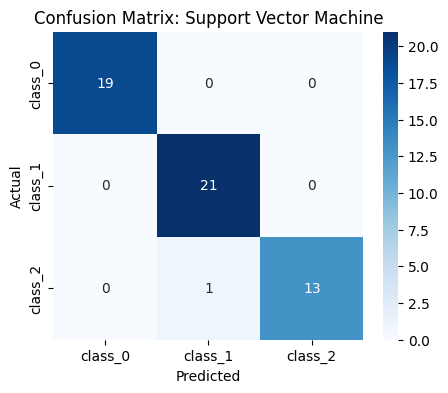

In [51]:
# 6. Support Vector Machine (SVM)
# Initialize the model
svc = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)

# Train
svc.fit(X_train, y_train)

# Predict
y_pred_svc = svc.predict(X_test)

# Evaluate
print("Support Vector Machine\n", classification_report(y_test, y_pred_svc))

# Plot confusion matrix
plot_conf_matrix(y_test, y_pred_svc, "Support Vector Machine")

# Store accuracy
results.loc[len(results)] = ['Support Vector Machine', accuracy_score(y_test, y_pred_svc)]


In [53]:
print(results)

                    Model  Accuracy
0     Logistic Regression  0.981481
1           Decision Tree  0.962963
2           Random Forest  1.000000
3     K-Nearest Neighbors  0.981481
4             Naive Bayes  1.000000
5  Support Vector Machine  0.981481
